In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import sys, platform, os
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import camb
from camb import model, initialpower

In [14]:
def kzp(mnu, sigma12):
    """
    Returns the scale axis, redshifts, and power spectrum of a Lambda-CDM
    model
    @param mnu : neutrino mass
    @param sigma12 : if the spectrum should be rescaled,
        this parameter determines the sigma12 of the model
    """
    raise NotImplemented("This is so far just a duplicate of the code for the massive" + \
                         "neutrino case. No generality has yet been included.")
    pars = camb.CAMBparams()
    pars.set_cosmology(H0=67.5, ombh2=0.022, omch2=0.122, mnu=0.06, omk=0, tau=0.06)
    pars.InitPower.set_params(As = 2e-09, ns=0.965)
    pars.set_matter_power(redshifts=[0.], kmax=2.0)
    pars.NonLinear = model.NonLinear_none
    results = camb.get_results(pars)
    results.calc_power_spectra(pars)
    kh, z, pk = results.get_matter_power_spectrum(minkh=1e-4, maxkh=1, npoints = 200)

In [2]:
pars = camb.CAMBparams()
pars.set_cosmology(H0=67.5, ombh2=0.022, omch2=0.122, mnu=0.06, omk=0, tau=0.06)
pars.InitPower.set_params(As = 2e-09, ns=0.965)
pars.set_matter_power(redshifts=[0.], kmax=2.0)
pars.NonLinear = model.NonLinear_none
results = camb.get_results(pars)
results.calc_power_spectra(pars)
kh, z, pk = results.get_matter_power_spectrum(minkh=1e-4, maxkh=1, npoints = 200)

In [3]:
pars_ml = camb.CAMBparams()
pars_ml.set_cosmology(H0=67.5, ombh2=0.022, omch2=0.122, mnu=0.0, omk=0, tau=0.06)
pars_ml.InitPower.set_params(As = 2e-09, ns=0.965)
pars_ml.set_matter_power(redshifts=[0.], kmax=2.0)
pars_ml.NonLinear = model.NonLinear_none
results_ml = camb.get_results(pars_ml)
results_ml.calc_power_spectra(pars_ml)
kh_ml, z_ml, pk_ml = results_ml.get_matter_power_spectrum(minkh=1e-4, maxkh=1, npoints = 200)

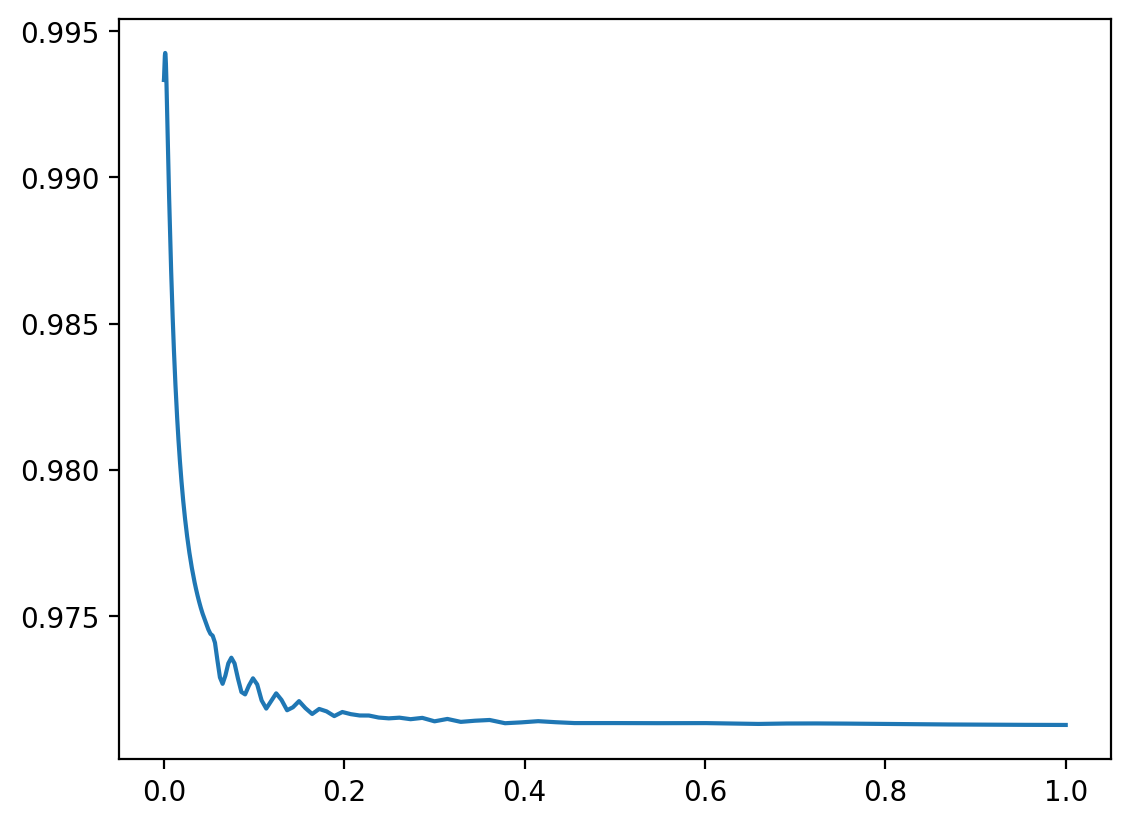

In [4]:
plt.plot(kh_ml, pk[0] / pk_ml[0])

In [5]:
sigma12_massless = results_ml.get_sigmaR(12, hubble_units=False)
print(sigma12_massless)
sigma12_massive = results.get_sigmaR(12, hubble_units=False)
print(sigma12_massive)

[0.80717813]
[0.79587563]


In [6]:
# We want to rescale the massless-neutrino spectrum to have the same amplitude
# as that of the massive -neutrino spectrum.
As_massless = 2e-9 * (sigma12_massive / sigma12_massless) ** 2

In [7]:
As_massless

array([1.9443822e-09])

In [8]:
pars_rescaled = camb.CAMBparams()
# We've calculated what the massless amplitude needs to be;
# let's generate a new massless cosmology based thereon.
pars_rescaled.set_cosmology(H0=67.5, ombh2=0.022, omch2=0.122, mnu=0.0)
pars_rescaled.InitPower.set_params(As = As_massless, ns=0.965)
pars_rescaled.set_matter_power(redshifts=[0.], kmax=2.0)
pars_rescaled.NonLinear = model.NonLinear_none
results_rescaled = camb.get_results(pars_rescaled)
results_rescaled.calc_power_spectra(pars_rescaled)
kh_rescaled, z_rescaled, pk_rescaled = results_rescaled.get_matter_power_spectrum(minkh=1e-4, maxkh=1, npoints = 200)

In [9]:
sigma12_rescaled = results_rescaled.get_sigmaR(12, hubble_units=False)
print(sigma12_rescaled)

[0.79586313]


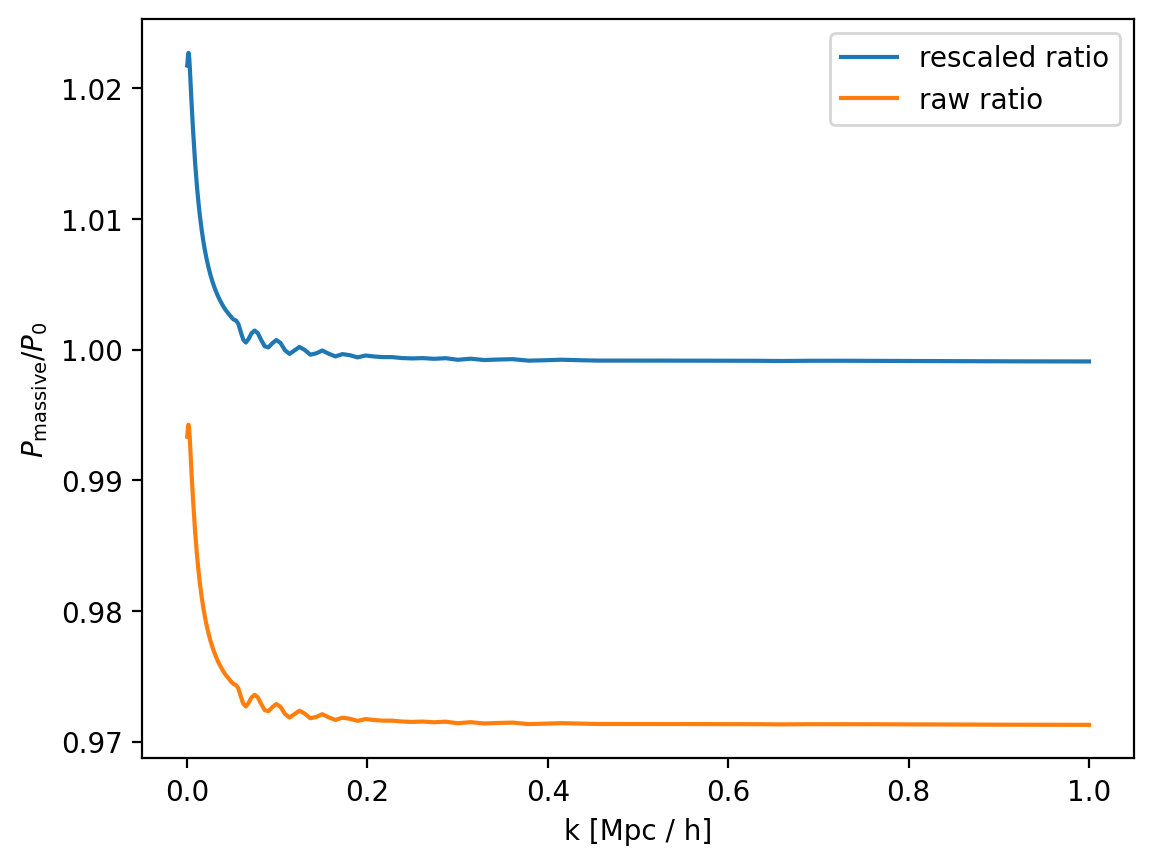

In [11]:
plt.plot(kh, pk[0] / pk_rescaled[0], label="rescaled ratio")
plt.plot(kh, pk[0] / pk_ml[0], label="raw ratio")
plt.xlabel(r"k [Mpc / h]")
plt.ylabel(r"$P_\mathrm{massive} / P_0$")
plt.legend()